# IPL Win Probability Predictor

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008



## Objective

Based on the first innings performance of a team, this project is about building a model capable of predicting the win probability percentage of each team using the current data of the second innings.


The dataset consist of data about IPL matches played from the year 2008 to 2019. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2019 was estimated to be ₹475 billion (US$6.7 billion). So let’s analyze IPL through stats.

    id: The IPL match id.
    season: The IPL season
    city: The city where the IPL match was held.
    date: The date on which the match was held.
    team1: One of the teams of the IPL match
    team2: The other team of the IPL match
    toss_winner: The team that won the toss
    toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
    result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
    dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
    winner: The winner of the match.
    win_by_runs: Provides the runs by which the team batting first won
    win_by_runs: Provides the number of wickets by which the team batting second won.
    player_of_match: The outstanding player of the match.
    venue: The venue where the match was hosted.
    umpire1: One of the two on-field umpires who officiate the match.
    umpire2: One of the two on-field umpires who officiate the match.
    umpire3: The off-field umpire who officiates the match

In [1]:
# import dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
# Check the shape of both datasets
matches.shape, deliveries.shape

((756, 18), (179078, 21))

In [5]:
# get the name of the columns of the delivery dataset
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

We are assuming that the first inning has taken place and the second inning is about to take place, so we want to see which team is winning.

In [6]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172,in that way

total_runs_df = deliveries.groupby(["match_id", "inning"]).sum(numeric_only=True)["total_runs"].reset_index()

total_runs_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [7]:
# Extracting only the first innings as we will be predicting for the second inning.
total_runs_df = total_runs_df[total_runs_df["inning"] == 1]

# we are adding 1 to total_runs, because for the second team to win they must get more runs than the first team
total_runs_df["total_runs"] = total_runs_df["total_runs"].apply(lambda x:x+1)

total_runs_df

C:\Users\Segun Lawal\AppData\Local\Temp\ipykernel_1416\2661861286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_runs_df["total_runs"] = total_runs_df["total_runs"].apply(lambda x:x+1)


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [8]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

We have gotten the total runs for the first inning of each match, we will now merge this data frame with the matches data frame. A left side merging will be done on the `"id"` column of the matches data frame and a right side merge will be done on the `"match_id"` of the total_run_df

In [9]:
# merge the match df and the total_run_df

match_df = matches.merge(total_runs_df[["match_id", "total_runs"]], 
             left_on="id", right_on="match_id")

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [10]:
# Let's have a look at the teams
match_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
# we will be considering the most frequently participating teams
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [12]:
# replacing the old name Delhi Daredevils with new name Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# replacing the old name Deccan Chargers with new name Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [13]:
# will consider only frequently occuring teams,
# which are mentioned in the teams list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [14]:
# check the shape of the updated data frame
match_df.shape

(641, 20)

In [15]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


The Duckworth–Lewis–Stern method (DLS) is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match **interrupted by weather or other circumstances**. It is generally accepted to be the most accurate method of setting a target score. 

In [16]:
# Check matches that resulted in Duckworth–Lewis–Stern method 
# (dl meethod)
match_df[match_df["dl_applied"]==1].style.background_gradient(cmap="plasma")

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,10-05-2014,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144
536,537,IPL-2015,Visakhapatnam,22-04-2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,177


In [17]:
# We will drop every row of matches decided by DLS method
# and considering only matches that were completed
match_df = match_df[match_df["dl_applied"]==0]

# for this analysis we will consider the match_id, city, winner 
# and total runs

match_df = match_df[["match_id", "city", "winner", "total_runs"]]

match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


The above features are what we need from the match_df. More important features will be extracted from the deliveries dataframe

In [18]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


The two dataframes have the `match_id` column. Therefore we will combine both of them.

In [19]:
# merging match_df with deliveries on the match_id column
delivery_df = match_df.merge(deliveries, on="match_id")

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
# view columns of newly merged data frame
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

Our initial data frame only contains total runs of first innings, this is because we want to predict the total runs of second innings. Now we will consider the second innings.

In [21]:
# considering 2nd innings
delivery_df = delivery_df[delivery_df["inning"] == 2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [22]:
delivery_df.shape

(72413, 24)

By observing, we can see that in the match_df, we had taken first innings total_runs, and in the second case, that is the delivery_df, we considered the second innings runs because our main aim is to find the probability of either teams winning or loosing the match.

For this, we need current runs and run rate. For current runs, we apply groupby on match_id and take the cumulative sum with respect to total_runs_y. Total_runs was present match_df as well as deliveries dataframe, but as we merged the two dataframes, it resulted in total_runs_x for match_df and total_runs_y for deliveries dataframe. Therefore, total_run_x is the first innings runs and total_runs_y are the second innings runs, ball by ball. By applying cumulative sum, this runs becomes the current score.

total_runs_y gives the runs scored after each ball, therefore in the second innings, we want to get the total second inning runs.Therefore we will groupby match_id and will apply the cumulative sum.

In [23]:
# current score ao a particular match
delivery_df["current_score"] = delivery_df.groupby(["match_id"]).cumsum(numeric_only=True)["total_runs_y"]

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [24]:
# Calculate the runs left to chase

delivery_df["runs_left"] = delivery_df["total_runs_x"] - delivery_df["current_score"]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


if one ball is played,then balls left = 120-1 = 119........(1)
if two balls are played,then balls left = 120-2 = 118

so similarly if over=1,over has 6 balls right,so 1*6 = 6
now,ball = 1,so 6+1 = 7,now 126-7 = 119,which is same as (1)

so we'll use balls_left = 126-(over*6+current_ball)


In [25]:
# Calculate total balls left
delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [26]:
# check the playerss dismissed
list(delivery_df["player_dismissed"].unique())[:5]

[nan, 'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head']

`Nan` represents that the player was not dismissed and a name indicates that the player was dismissed. We want to replace `Nan` with 0 and a players name with 1

In [27]:
# fill NaN values with "0"
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1

delivery_df["player_dismissed"] = delivery_df["player_dismissed"].apply(lambda x: x if x=="0" else "1")

# Convert string to integer
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].astype("int")

# check unique values
delivery_df["player_dismissed"].unique()

array([0, 1])

In [28]:
# wickets fallen
wickets = delivery_df.groupby('match_id').cumsum(numeric_only=True)['player_dismissed'].values

# a wicket = 10
delivery_df['wickets'] = 10-wickets

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4


In [29]:
# current run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required run rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])


delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385


In [30]:
# function
def result_fun(row):
    return 1 if row["batting_team"] == row["winner"] else 0

In [31]:
delivery_df["result"] = delivery_df.apply(result_fun, axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


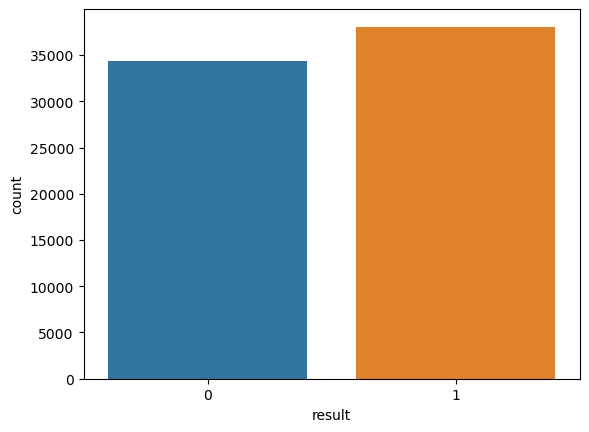

In [32]:
# get the results countplot
sns.countplot(x="result", data=delivery_df);

In [45]:
delivery_df["result"].value_counts()

1    38062
0    34351
Name: result, dtype: int64

In [33]:
# Select only specific columns
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


In [34]:
final_df.shape

(72413, 10)

## Model Building

In [35]:
# Serach for null values
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
cur_run_rate      0
req_run_rate      5
result            0
dtype: int64

In [36]:
# Droppin all null values

final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [37]:
# we will selt rows that "balls_left" != 0
final_df = final_df[final_df["balls_left"] != 0]

In [38]:
# Create a copy of the dataset
data = final_df.copy()

y = data["result"]

X = data.drop(["result"], axis=1)

X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

X_train.shape, X_test.shape

((57073, 9), (14269, 9))

In [40]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [41]:
# import model building libriaries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [42]:
# batting team,bowling team and city are categorical columns
# they will be converted to numeric using onehot encoder
ct = ColumnTransformer([
    ("trf", OneHotEncoder(sparse_output=False, drop="first"), 
     ['batting_team','bowling_team','city'])
], remainder="passthrough")

In [43]:
# Create the Pipeline

pipe = Pipeline(steps=[
    ("step1",ct), 
    ("step2",LogisticRegression(solver="liblinear"))
])

# fitting the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
# Make prediction
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8063634452309202


In [55]:
# view a sample prediction probability
pipe.predict_proba(X_test)[10]

array([0.54477506, 0.45522494])

In [49]:
# Lets train a Random forest model
pipe2 = Pipeline(steps=[
    ("step1",ct), 
    ("step2",RandomForestClassifier())
])

# fitting the training data
pipe2.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, pipe2.predict(X_test)))

0.9992991800406475


In [56]:
# making the same prediction probability with RF model
pipe2.predict_proba(X_test)[10]

array([0.05, 0.95])

We will go with the Logistic Regression Model because we need to showcase the probability. Though Random Forest Model is giving a much accurate result, bit it is being biased to one of the teams. Therefore it is better to use a model which gives "Equal Justice" towards both sides as we do not know which team will out perform and win the game in the second inning!

In [61]:
# saving the logistic regression model

import pickle 

pickle.dump(pipe, open("pipe.pkl", "wb"))